In [7]:
using LinearAlgebra
using Plots

**Task 1**

In [3]:
function mysqrt(y, err=1.e-5, max_iter=1000)
    if y <= 2
        x = (1 + y)/2
    else
        x = y/4
    end
    iter = 0
    
    while iter != max_iter
        x = x - (x^2 - y)/(2*x)
        iter += 1
        if abs(x^2 - y) < err
#             print("search took ", iter, " iterations")
            return x
        end
    end
    print("sqrt was not found")
    return 0 
    end

mysqrt (generic function with 3 methods)

In [4]:
Y = range(0, 10; step=0.1)
max_err = maximum(abs.(sqrt.(Y) .- mysqrt.(Y)))
print("Max error is ", max_err)

Max error is 0.001953125

**Task 2**

In [37]:
function rachford_rice_solve(z, K)
    xl = 1/(1 - maximum(K))
    xr = 1/(1 - minimum(K))
    f(x) = sum(z .* (K .- 1) ./ (x .* (K .- 1) .+ 1))
    G0 = regulafalsi(f, xl+0.1 , xr-0.1)
    return G0
end

function regulafalsi(f, x₁, x₂; maxiter=100, xtol=eps(), ftol=eps())
    if x₁ > x₂; x₁, x₂ = x₂, x₁; end
    y₁, y₂ = f.((x₁, x₂))
    sign(y₁) == sign(y₂) && error("Функция должна иметь разные знаки в концах отрезка")
    abs(y₁) < ftol && return x₁
    abs(y₂) < ftol && return x₂
    
    for i in 1:maxiter
        y₂ = f(x₂)
        xnew = (y₂*x₁ - y₁*x₂) / (y₂ - y₁)
        ynew = f(xnew)

        if sign(y₂) == sign(ynew)
            x₂, y₂ = xnew, ynew
        elseif sign(y₁) == sign(ynew)
            x₁, y₁ = xnew, ynew
        else
            return xnew
        end
        abs(ynew) < ftol && return xnew
        abs(x₂ - x₁) < xtol && return xnew
    end
    error("Число итераций превышено.")
end

function f(x, z::AbstractArray, K::AbstractArray)
    if typeof(x)<:Real
        return sum(z .* (K .- 1) ./ (x .* (K .- 1) .+ 1))
    end
    if typeof(x)<:AbstractVector || typeof(x)::AbstractArray
        return [sum(z .* (K .- 1) ./ (elem .* (K .- 1) .+ 1)) for elem in x]
    end
end


f (generic function with 1 method)

In [38]:
z = [[0.9, 0.1], [0.2463, 0.2208, 0.2208, 0.3121]]
K = [[1.5, 0.01], [40, 25, 0.6, 0.005]]
Roots = [rachford_rice_solve(z[1], K[1]), rachford_rice_solve(z[2], K[2])]

2-element Vector{Float64}:
 0.709090909090909
 0.5506554018599482

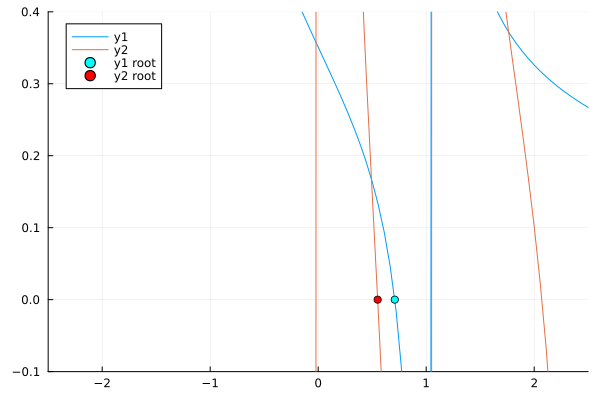

In [60]:
plt = plot(;
    ylim=(-0.1, 0.4),
    xlim=(-2.5, 2.5),
    lw=2,
)

x = collect(range(-3., 2.5; length=100))
plot!(x, f(x, z[1], K[1]))
plot!(x, f(x, z[2], K[2]))
scatter!([Roots[1]], [0], label="y1 root", color=:cyan)
scatter!([Roots[2]], [0], label="y2 root", color=:red)
plt